In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.arange(0,8*np.pi, 0.001)
e1 = np.random.randn(len(x))
y = np.sin(x) + e1
e2 = np.random.randn(len(x))
y_test = np.sin(x) + e2
len(x)

25133

Above is not a proper way to sample from the given distribution, instead one should sample randomly from the generated distribution:

In [3]:
train_idx = np.random.choice(np.arange(0,len(x)), 1000) 
train_x = np.array([x[idx] for idx in train_idx])
train_y = np.array([y[idx] for idx in train_idx])

test_idx = np.random.choice(np.arange(0,len(x)), 1000) 
test_x = np.array([x[idx] for idx in test_idx])
test_y = np.array([y[idx] for idx in test_idx])

train_x.shape


(1000,)

In [4]:
nrandom.shuffle(data)

train_data = data[:50]
test_data = data[50:]

NameError: name 'random' is not defined

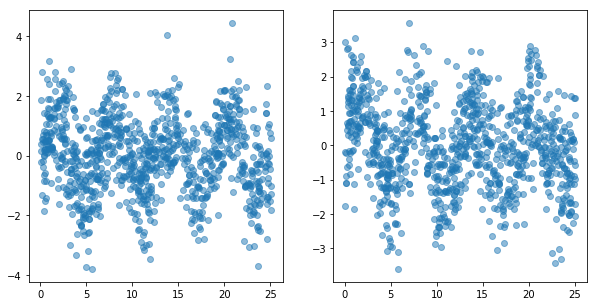

In [5]:
f, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].scatter(train_x, train_y, alpha = 0.5)
ax[1].scatter(test_x, test_y,alpha = 0.5)
plt.show()

Simple 1-dim polynomial regression with given degree p

In [248]:
def simple_one_dim_poly_reg(x,y,p):
    X = np.transpose([ x**i for i in np.arange(0,p+1) ])
    beta = np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    Y_hat = X.dot(beta)
    RSS = sum((y-Y_hat)**2)
    return(Y_hat, beta, RSS)

In [253]:
simple_one_dim_poly_reg(train_x,train_y,5)[1].shape


(6,)

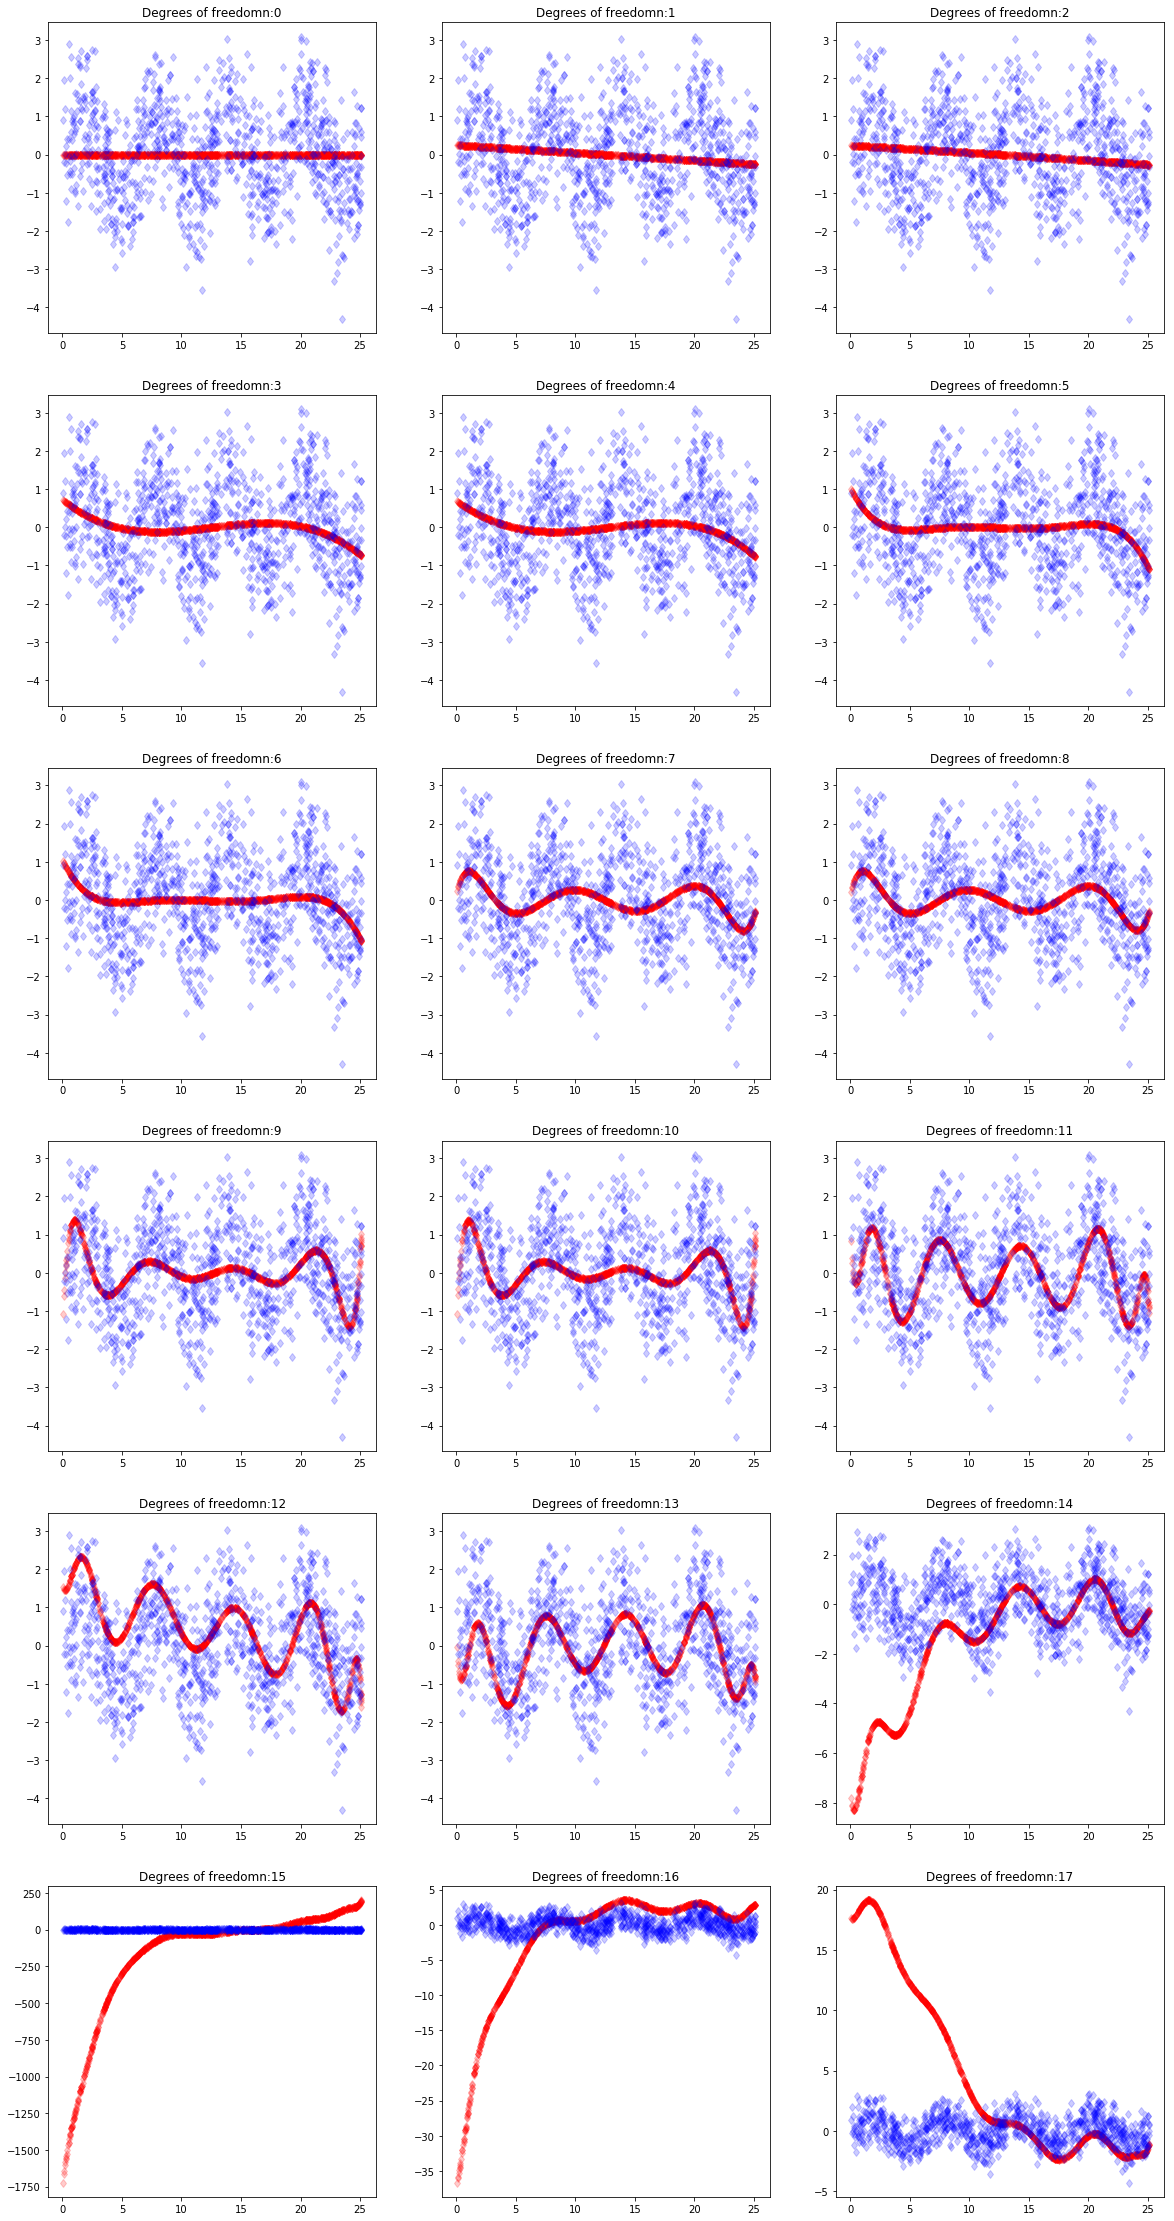

In [275]:
Y_hats = []
betas = []
RSSs = []
RSSs_val = []

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 40))
pltrow = 0
pltcol = 0


for i in range(0,18):
    #y_hat = simple_one_dim_poly_reg(x,y,i)[0]
    
    beta = simple_one_dim_poly_reg(x,y,i)[1]
    #RSS = simple_one_dim_poly_reg(x,y,i)[2]
    X = np.transpose([ test_x**i for i in np.arange(0,i+1) ])
    Y_hat = X.dot(beta)
    RSS = sum((test_y-Y_hat)**2)
    
    Y_hats.append(Y_hat)
    betas.append(beta)
    RSSs.append(RSS)
    #RSSs_val.append(RSS_val)
    pltrow = int(i / 3)
    pltcol = i % 3
    axes[pltrow,pltcol].plot(test_x,Y_hat, 'r', linestyle = 'none', marker = 'd', alpha = 0.2 )
    axes[pltrow,pltcol].plot(test_x,test_y,'b', linestyle = 'none', marker = 'd',alpha = 0.2)
    title = 'Degrees of freedomn:' + str(i)
    axes[pltrow,pltcol].set_title(title)
    #axes[pltrow,pltcol].set_ylim([2,2])
    #plt.ylim(-5,5)

    
plt.show()

In [273]:
print('Optimal Degree of Polynomial regression: ' + str(np.argmin(RSSs)) + 'with min RSS: ' str())

Optimal Degree of Polynomial regression based on RSS: 11


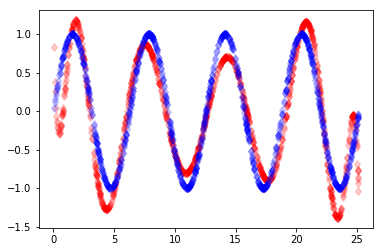

In [290]:
plt.plot(test_x,Y_hats[11], 'r', linestyle = 'none',marker = 'd', alpha = 0.2)
plt.plot(test_x,np.sin(test_x),'b', linestyle = 'none',marker = 'd', alpha = 0.2)

plt.show()